### Prediction of Real-time Election Results: Portugal 2019 

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

In [4]:
#Reading csv file and creating the table
df=pd.read_csv("ElectionData.csv")
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [5]:
#getting all columns name and checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

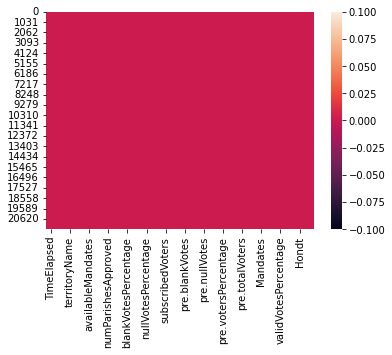

In [6]:
#Checking null values
sns.heatmap(df.isnull())
plt.show()

##### Observations: 
No null values are present in the dataset

In [7]:
#Lets chcek the datatypes of each column in datset
df.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [8]:
#Changing datatype into datetime format

df['Date']=pd.to_datetime(df['time']).dt.date
df['time'] = pd.to_datetime(df['time']).dt.time
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Date
0,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,PS,0,38.29,40.22,147993,94,106,2019-10-06
1,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,2019-10-06
2,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,B.E.,0,6.81,7.15,26307,16,19,2019-10-06
3,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5,2019-10-06
4,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12,2019-10-06


## EDA Analysis

In [9]:
#Understanding the data
cols=["territoryName","Party"]
for i in cols:
    print("Number of unique values in ", i ," are : ",len(df[i].unique()), " : " ,df[i].unique())


Number of unique values in  territoryName  are :  21  :  ['Território Nacional' 'Aveiro' 'Beja' 'Braga' 'Bragança' 'Castelo Branco'
 'Coimbra' 'Évora' 'Faro' 'Guarda' 'Leiria' 'Lisboa' 'Madeira'
 'Portalegre' 'Porto' 'Santarém' 'Setúbal' 'Viana do Castelo' 'Vila Real'
 'Viseu' 'Açores']
Number of unique values in  Party  are :  21  :  ['PS' 'PPD/PSD' 'B.E.' 'CDS-PP' 'PCP-PEV' 'PAN' 'CH' 'R.I.R.' 'PCTP/MRPP'
 'A' 'L' 'IL' 'JPP' 'NC' 'PDR' 'PNR' 'PURP' 'PPM' 'MPT' 'PTP' 'MAS']


### DATA VISUALIZATION

##### UNIVARIATE ANALYSIS

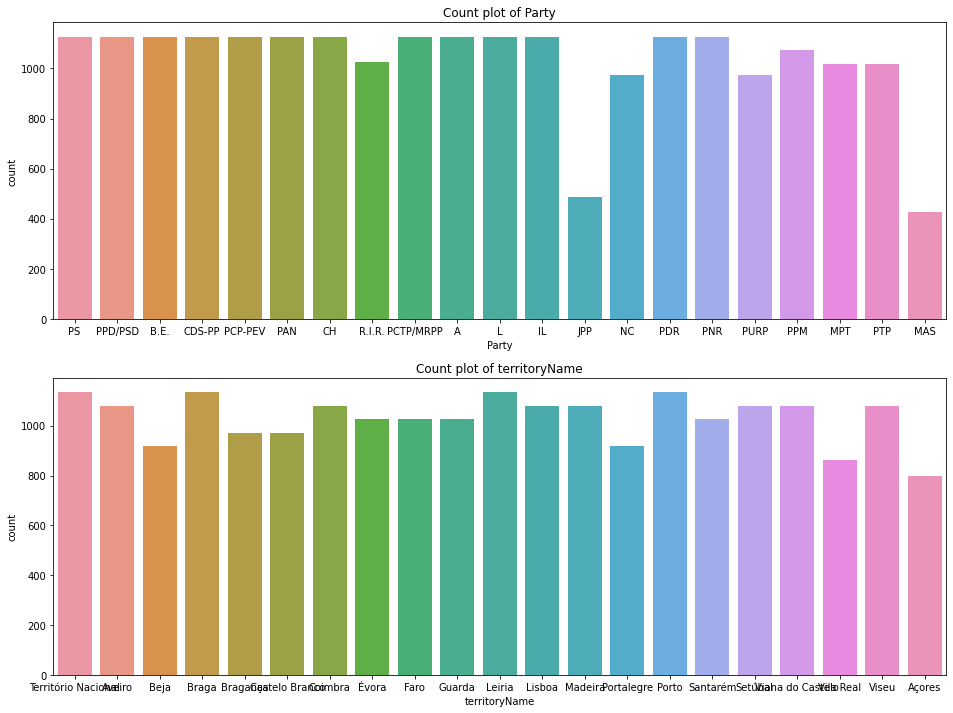

In [10]:
cols = ["Party","territoryName"]
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=[16,12])
for i in range(0,len(cols)):
    axes[i]=sns.countplot(x = cols[i],data = df,ax=axes[i])
    axes[i].set_title("Count plot of "+cols[i])


##### Observation:
a. Parties with minimum count are JPP and MAS .  
b. Most territories have count in the ranges of 800 to 1000 per territory (indicating equal distribution of voters in different territories)

<AxesSubplot:>

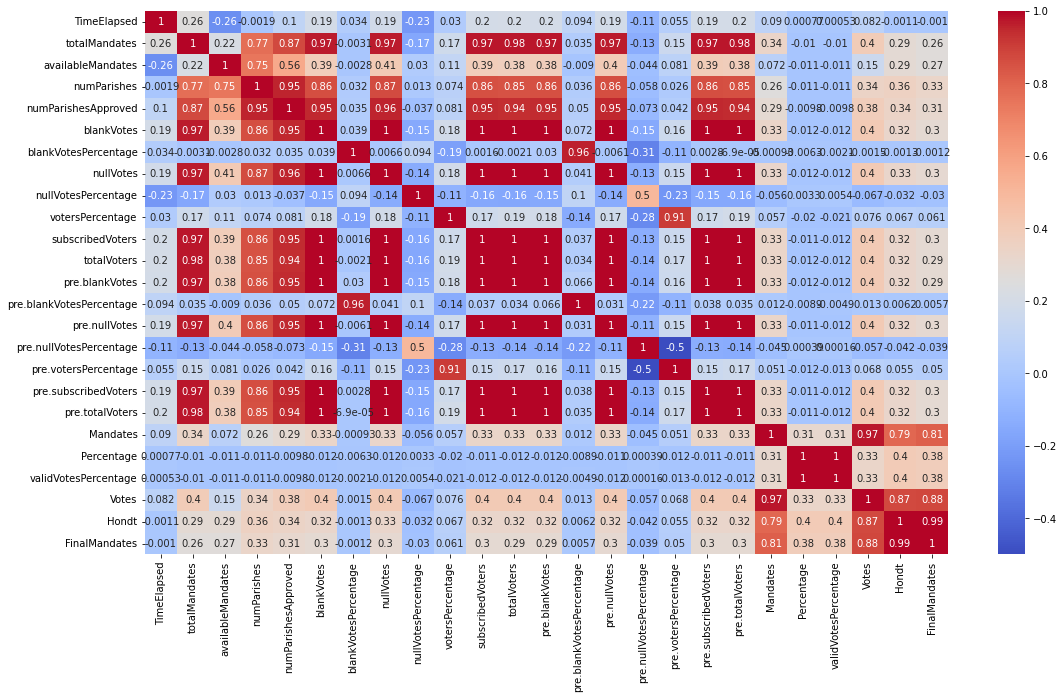

In [11]:
#checking correlation in variables
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

##### Observations: 
a. Clearly some factors are very highly correlated >0.9 .  
b. These high corelating factors can be combined later to decrease dimensionality of the model. 

#### BIVARIATE ANALYSIS

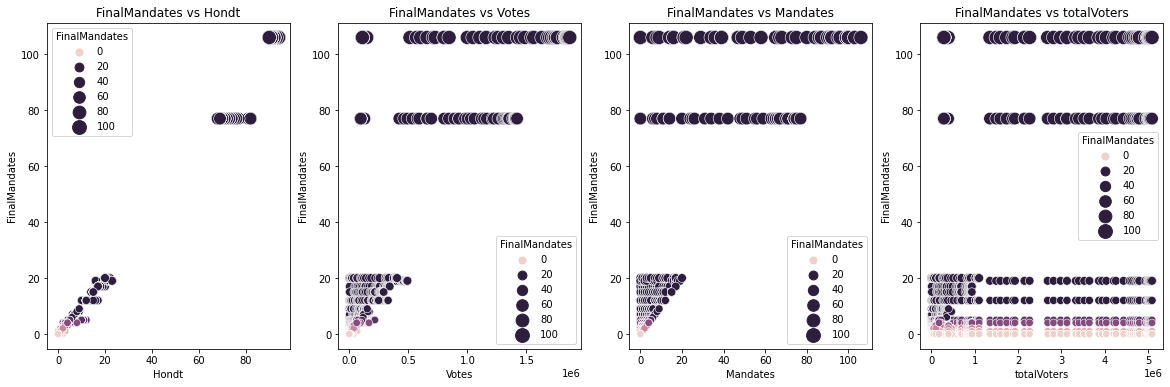

In [12]:
#Plotting different variables against target variable-Final mandate to find the best correlation
cols=["Hondt","Votes","Mandates","totalVoters"]

fig, axes = plt.subplots(nrows=1,ncols=4,figsize=[20,6])
for i in range(0,len(cols)):
    axes[i]=sns.scatterplot( x= cols[i], y="FinalMandates", data = df,hue="FinalMandates", size = "FinalMandates",    sizes=(50,200), hue_norm=(0, 6),cmap="accent",ax=axes[i])
    axes[i].set_title("FinalMandates vs "+cols[i])

##### Observations:
a. Hondt -  This seems to be linearly correlated with the target variable but also shows some outliers .   
b. Votes - This value is also discrete and positively corelated with the FinalMandates.  
c. Mandates - This variable shows discrete relationship with the target variables.  
d. toal Voters - This variable show negligible correlation with the Target variables  

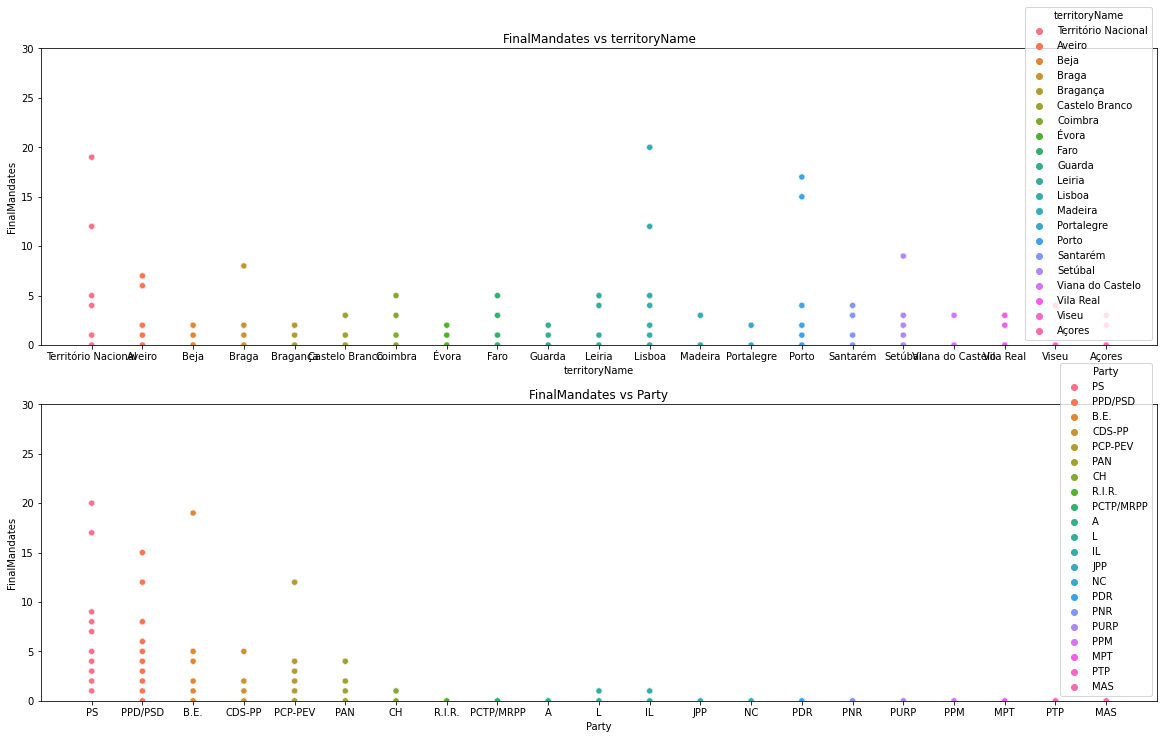

In [13]:
#Plotting different variables against target variable-Final mandate to understand the data better
cols=["territoryName","Party"]

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=[20,12])
for i in range(0,len(cols)):
    axes[i]=sns.scatterplot( x= cols[i], y="FinalMandates", data = df,hue=cols[i], ax=axes[i])
    axes[i].set_title("FinalMandates vs "+cols[i])
    axes[i].set_ylim(0,30)

##### Observations:
a. Territory Name -  
>Clearly some outliers are present in the relationship   
>Additionaly some territory like Porto , Territorio and Lisba have higher values of finalMandate

b. Party:
> Some parties like PS, PPD , BE, CDS have more finalvotes than few of the smaller parties.

#### PCA Analysis

In [14]:
#Reducing dimensionality by reducing correlated factors
cols_grp1=['totalMandates','numParishesApproved','blankVotes','nullVotes','subscribedVoters','totalVoters','pre.blankVotes','pre.nullVotes','pre.subscribedVoters','pre.totalVoters','Percentage','Mandates','pre.blankVotesPercentage','pre.votersPercentage']
cols_grp2=["Votes","Hondt"]
#first scaling using standard scalor
df1 = df[cols_grp1]
df2=df[cols_grp2]
#Standardizing value of x by using standardscalar to make the data normally distributed
sc = StandardScaler()
a = sc.fit_transform(df1)
df_1 = pd.DataFrame(a,columns=df1.columns)
b = sc.fit_transform(df2)
df_2 = pd.DataFrame(b,columns=df2.columns)

In [39]:
# Principal Component Analysis
pca = PCA(n_components=1)
new_var1 = pca.fit_transform(df_1)
new_var2=pca.fit_transform(df_2)


# updating dataframe 
df_new = pd.concat((df, pd.DataFrame(new_var1)), axis=1)
df_new.rename({0: 'PCA_1'}, axis=1, inplace = True)
df_new.drop(cols_grp1, axis=1, inplace=True)
df_new = pd.concat((df_new, pd.DataFrame(new_var2)), axis=1)
df_new.rename({0: 'PCA_2'}, axis=1, inplace = True)
df_new.drop(cols_grp2, axis=1, inplace=True)
df_new.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,FinalMandates,Date,PCA_1,PCA_2
0,0,20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,106,2019-10-06,0.508012,11.438592
1,0,20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,77,2019-10-06,0.508034,9.830850
2,0,20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,19,2019-10-06,0.508147,1.750582
3,0,20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,5,2019-10-06,0.508155,1.245075
4,0,20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,12,2019-10-06,0.508156,1.123863


In [19]:
#With this analysis we combined 13 variables into two group variables PCA1 and PCA2
df=df_new

#### LABEL ENCODING of Categorical Variables

In [20]:
#Label encoding categorical variables
obj_col =[]
for i in df.columns:
    if df[i].dtypes=="O":
        obj_col.append(i)
obj_col

['time', 'territoryName', 'Party', 'Date']

In [21]:
le = LabelEncoder()
for i in obj_col:
    df[i]=pd.DataFrame(le.fit_transform(df[i]))
df.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,FinalMandates,Date,PCA_1,PCA_2
0,0,8,16,226,3092,2.5,2.3,51.36,1.91,17,40.22,106,0,0.508012,11.438592
1,0,8,16,226,3092,2.5,2.3,51.36,1.91,15,34.95,77,0,0.508034,9.830850
2,0,8,16,226,3092,2.5,2.3,51.36,1.91,1,7.15,19,0,0.508147,1.750582
3,0,8,16,226,3092,2.5,2.3,51.36,1.91,2,5.14,5,0,0.508155,1.245075
4,0,8,16,226,3092,2.5,2.3,51.36,1.91,11,4.83,12,0,0.508156,1.123863


#### REMOVING OUTLIERS

In [22]:
#Checking for outliers
df.describe()

#clearly some outliers is present in the data

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,FinalMandates,Date,PCA_1,PCA_2
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04
mean,133.146052,26.585224,10.116851,11.499284,309.956013,2.621629,1.961471,51.983722,1.777442,10.096521,5.207232,1.126138,0.148963,0.000000,1.575847e-17
std,77.651193,15.585676,5.985225,31.738783,659.055911,0.795289,0.375250,4.854380,0.388798,6.129654,10.881108,6.872644,0.356060,3.160511,1.368482e+00
min,0.000000,0.000000,0.000000,0.000000,54.000000,0.530000,1.340000,35.980000,1.140000,0.000000,0.020000,0.000000,0.000000,-1.410571,-2.469153e-01
25%,65.000000,13.000000,5.000000,0.000000,75.000000,2.230000,1.720000,50.290000,1.520000,4.000000,0.230000,0.000000,0.000000,-1.049483,-2.451153e-01
50%,135.000000,27.000000,10.000000,3.000000,147.000000,2.640000,1.870000,53.130000,1.690000,11.000000,0.650000,0.000000,0.000000,-0.872575,-2.407407e-01
75%,200.000000,40.000000,15.000000,9.000000,242.000000,2.980000,2.230000,54.550000,1.970000,15.000000,3.160000,0.000000,0.000000,-0.422362,-2.014299e-01
max,265.000000,53.000000,20.000000,226.000000,3092.000000,5.460000,3.350000,59.870000,3.120000,20.000000,51.420000,106.000000,1.000000,20.662913,2.404020e+01


TimeElapsed                   AxesSubplot(0.125,0.749828;0.133621x0.130172)
time                       AxesSubplot(0.285345,0.749828;0.133621x0.130172)
territoryName               AxesSubplot(0.44569,0.749828;0.133621x0.130172)
availableMandates          AxesSubplot(0.606034,0.749828;0.133621x0.130172)
numParishes                AxesSubplot(0.766379,0.749828;0.133621x0.130172)
blankVotesPercentage          AxesSubplot(0.125,0.593621;0.133621x0.130172)
nullVotesPercentage        AxesSubplot(0.285345,0.593621;0.133621x0.130172)
votersPercentage            AxesSubplot(0.44569,0.593621;0.133621x0.130172)
pre.nullVotesPercentage    AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Party                      AxesSubplot(0.766379,0.593621;0.133621x0.130172)
validVotesPercentage          AxesSubplot(0.125,0.437414;0.133621x0.130172)
FinalMandates              AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Date                        AxesSubplot(0.44569,0.437414;0.133621x0.130172)
PCA_1       

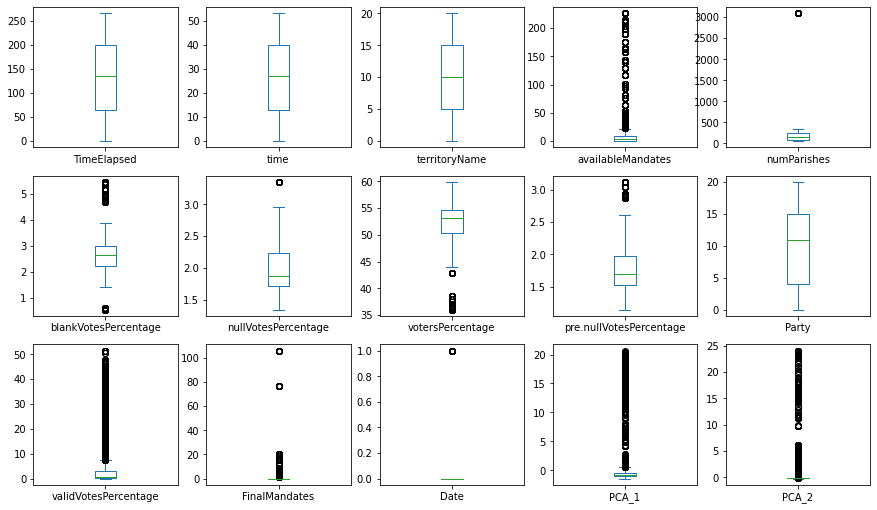

In [23]:
#Now we will check for outliers using boxplot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

In [24]:
z = np.abs(zscore(df))

In [25]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 21642, 21642, 21642], dtype=int64), array([ 0,  1,  2, ..., 12, 13, 14], dtype=int64))
(21643, 15)


In [26]:
#Assign the value to df_new which are less the threshold value and removing the outliers
filtered_entries= (z < 3).all(axis=1)
df_new = df[filtered_entries]

In [27]:
print(df.shape)
print(df_new.shape)
df_new.tail()

(21643, 15)
(18344, 15)


,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,FinalMandates,Date,PCA_1,PCA_2
21638,265,7,19,0,277,2.81,2.08,51.04,1.9,9,0.20,0,1,-0.523330,-0.244401
21639,265,7,19,0,277,2.81,2.08,51.04,1.9,14,0.19,0,1,-0.523330,-0.244447
21640,265,7,19,0,277,2.81,2.08,51.04,1.9,8,0.15,0,1,-0.523329,-0.244979
21641,265,7,19,0,277,2.81,2.08,51.04,1.9,18,0.14,0,1,-0.523329,-0.245108
21642,265,7,19,0,277,2.81,2.08,51.04,1.9,5,0.07,0,1,-0.523329,-0.246027


In [28]:
#Assign the value to df_new which are less the threshold value and removing the outliers
df_new = df[(z<3).all(axis = 1)]
df=df_new

TimeElapsed                   AxesSubplot(0.125,0.749828;0.133621x0.130172)
time                       AxesSubplot(0.285345,0.749828;0.133621x0.130172)
territoryName               AxesSubplot(0.44569,0.749828;0.133621x0.130172)
availableMandates          AxesSubplot(0.606034,0.749828;0.133621x0.130172)
numParishes                AxesSubplot(0.766379,0.749828;0.133621x0.130172)
blankVotesPercentage          AxesSubplot(0.125,0.593621;0.133621x0.130172)
nullVotesPercentage        AxesSubplot(0.285345,0.593621;0.133621x0.130172)
votersPercentage            AxesSubplot(0.44569,0.593621;0.133621x0.130172)
pre.nullVotesPercentage    AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Party                      AxesSubplot(0.766379,0.593621;0.133621x0.130172)
validVotesPercentage          AxesSubplot(0.125,0.437414;0.133621x0.130172)
FinalMandates              AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Date                        AxesSubplot(0.44569,0.437414;0.133621x0.130172)
PCA_1       

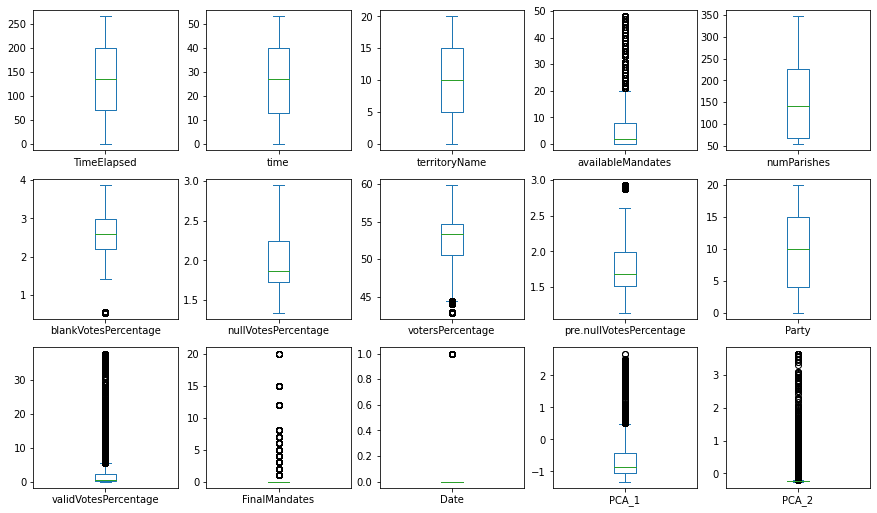

In [29]:
#Now we will check for outliers using boxplot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

array([[<AxesSubplot:title={'center':'TimeElapsed'}>,
        <AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'territoryName'}>,
        <AxesSubplot:title={'center':'availableMandates'}>],
       [<AxesSubplot:title={'center':'numParishes'}>,
        <AxesSubplot:title={'center':'blankVotesPercentage'}>,
        <AxesSubplot:title={'center':'nullVotesPercentage'}>,
        <AxesSubplot:title={'center':'votersPercentage'}>],
       [<AxesSubplot:title={'center':'pre.nullVotesPercentage'}>,
        <AxesSubplot:title={'center':'Party'}>,
        <AxesSubplot:title={'center':'validVotesPercentage'}>,
        <AxesSubplot:title={'center':'FinalMandates'}>],
       [<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'PCA_1'}>,
        <AxesSubplot:title={'center':'PCA_2'}>, <AxesSubplot:>]],
      dtype=object)

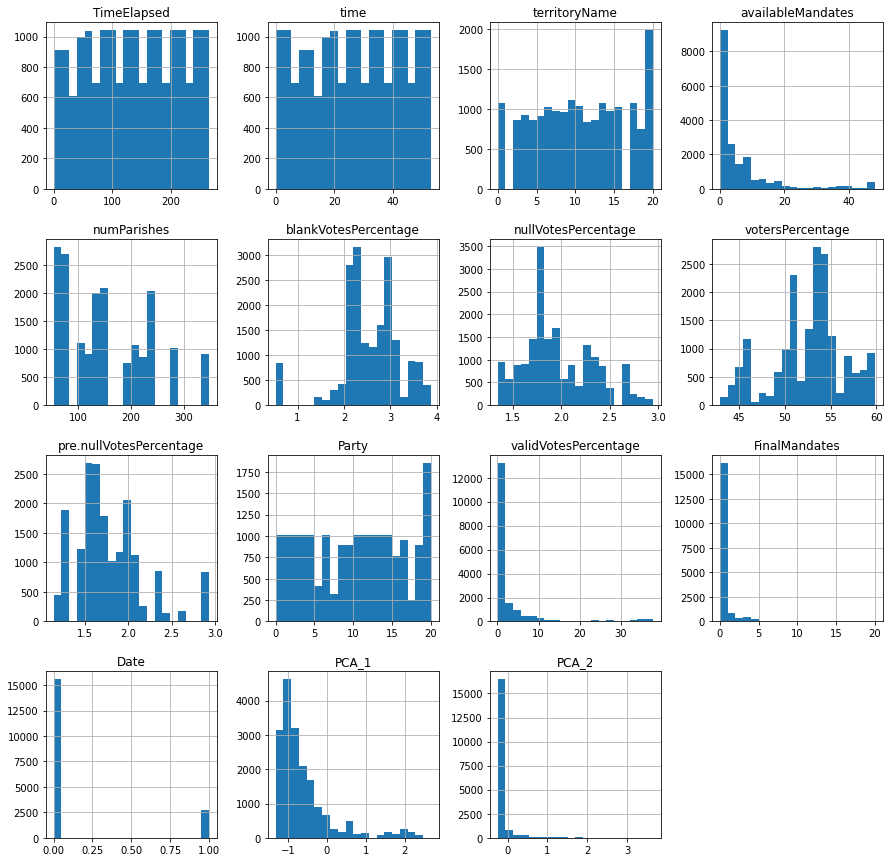

In [30]:
#Now plotting histogram for checking distribution of variables
df.hist(figsize=(15,15), layout=(4,4), bins=20)

##### Observations: 
a. Voters Percentage is skewed towards right  
b. prenull votes percentage and null votes percentage are skewed towards left.  
c. Also numParish, votes percentage, votes is also extremely skewed towards left  

In [31]:
#We will also check skewness with skew function

df.skew()

TimeElapsed               -0.024901
time                      -0.040654
territoryName              0.033275
availableMandates          2.594431
numParishes                0.583743
blankVotesPercentage      -0.843903
nullVotesPercentage        0.565344
votersPercentage          -0.391916
pre.nullVotesPercentage    1.034657
Party                      0.008492
validVotesPercentage       3.367065
FinalMandates              6.729034
Date                       1.946022
PCA_1                      2.173909
PCA_2                      6.740454
dtype: float64

In [32]:
#since skewness is >0.55
cols =["availableMandates","pre.nullVotesPercentage","validVotesPercentage"]

for col in cols:
    df[col]=np.sqrt(df[col])
            
df.skew()

#Now all have values less that <0.55

TimeElapsed               -0.024901
time                      -0.040654
territoryName              0.033275
availableMandates          0.999185
numParishes                0.583743
blankVotesPercentage      -0.843903
nullVotesPercentage        0.565344
votersPercentage          -0.391916
pre.nullVotesPercentage    0.722090
Party                      0.008492
validVotesPercentage       2.155448
FinalMandates              6.729034
Date                       1.946022
PCA_1                      2.173909
PCA_2                      6.740454
dtype: float64

array([[<AxesSubplot:title={'center':'TimeElapsed'}>,
        <AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'territoryName'}>,
        <AxesSubplot:title={'center':'availableMandates'}>],
       [<AxesSubplot:title={'center':'numParishes'}>,
        <AxesSubplot:title={'center':'blankVotesPercentage'}>,
        <AxesSubplot:title={'center':'nullVotesPercentage'}>,
        <AxesSubplot:title={'center':'votersPercentage'}>],
       [<AxesSubplot:title={'center':'pre.nullVotesPercentage'}>,
        <AxesSubplot:title={'center':'Party'}>,
        <AxesSubplot:title={'center':'validVotesPercentage'}>,
        <AxesSubplot:title={'center':'FinalMandates'}>],
       [<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'PCA_1'}>,
        <AxesSubplot:title={'center':'PCA_2'}>, <AxesSubplot:>]],
      dtype=object)

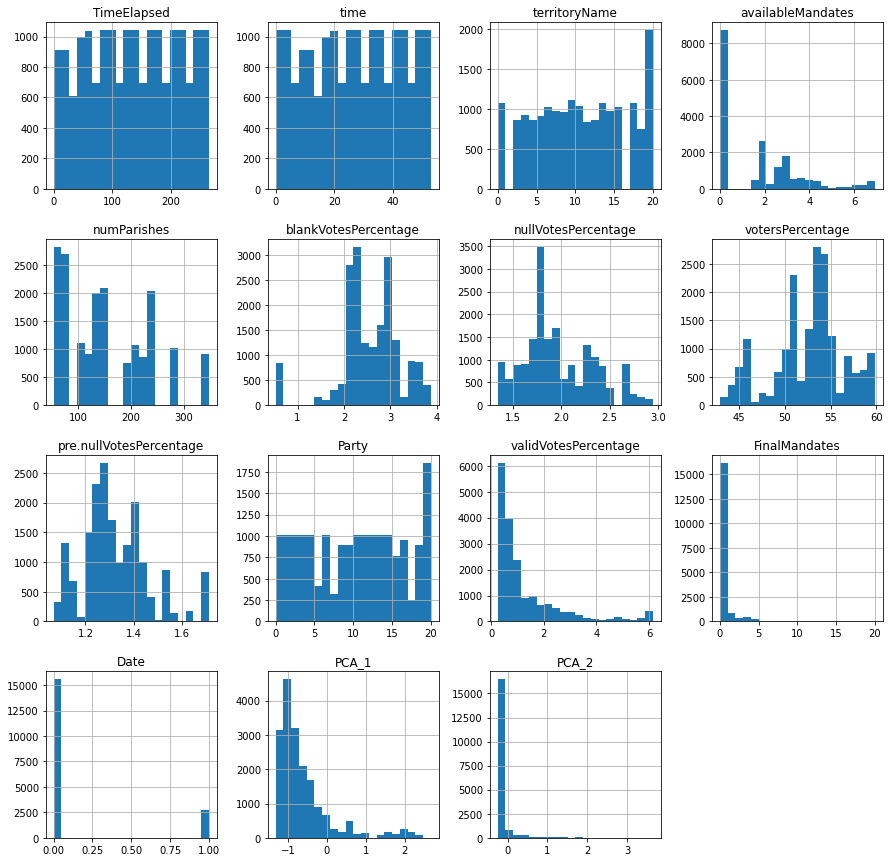

In [33]:
#Now plotting histogram again for checking distribution
df.hist(figsize=(15,15), layout=(4,4), bins=20)

## Regression Modelling

### Preparing Dataset

In [34]:
# dropping Final Mandate variable from X 
#assign the value of y for training
x = df.drop(columns=['FinalMandates'])
y = df[["FinalMandates"]]

In [35]:
#Standardizing value of x by using standardscalar to make the data normally distributed
sc = StandardScaler()
a = sc.fit_transform(x)
df_x = pd.DataFrame(a,columns=x.columns)
df_x.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Date,PCA_1,PCA_2
0,-1.752388,-1.205361,-1.742046,1.292301,-0.099866,0.540744,-1.043593,0.184517,-0.34429,1.177506,3.684684,-0.422273,-0.934591,2.377776
1,-1.752388,-1.205361,-1.742046,1.292301,-0.099866,0.540744,-1.043593,0.184517,-0.34429,-1.435865,1.185925,-0.422273,-0.934433,0.102026
2,-1.752388,-1.205361,-1.742046,1.292301,-0.099866,0.540744,-1.043593,0.184517,-0.34429,-1.272529,0.982331,-0.422273,-0.934425,0.099888
3,-1.752388,-1.205361,-1.742046,1.292301,-0.099866,0.540744,-1.043593,0.184517,-0.34429,0.197492,0.236778,-0.422273,-0.934403,-0.278242
4,-1.752388,-1.205361,-1.742046,1.292301,-0.099866,0.540744,-1.043593,0.184517,-0.34429,0.034156,0.144412,-0.422273,-0.934401,-0.278795


In [36]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.20,random_state=45)

In [37]:
#defining a function to find model score,r2 score for the given dataset
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2 score:',r2_score(y_test,predm))
    print('*'*100)
    print('\n')       

Score of LinearRegression() is: 0.9268396688197401
MAE: 0.17596203633460794
MSE: 0.197821783203049
RMSE: 0.44477160791022735
R2 score: 0.9237255371092374
****************************************************************************************************


Score of SVR() is: 0.9796493013290261
MAE: 0.07193266123338274
MSE: 0.05311306587992648
RMSE: 0.2304627212369204
R2 score: 0.9795211098248222
****************************************************************************************************


Score of DecisionTreeRegressor() is: 1.0
MAE: 0.0010902153175252113
MSE: 0.0010902153175252113
RMSE: 0.03301840876731057
R2 score: 0.9995796439278167
****************************************************************************************************


Score of KNeighborsRegressor() is: 0.9992994752227059
MAE: 0.006105205778141183
MSE: 0.002289452166802944
RMSE: 0.047848220100678185
R2 score: 0.9991172522484152
***********************************************************************************

##### Observations: 
a. Random Forest Regressor and Decision Tree Regressor Model are performing the best regression.  
b. Both models have extremely low error and high R2 score.  
c. Now we will tune both to choose the best results.  

In [38]:
#We will check for RFC and DTC individually
#Estimating parameters of DecisionTree Classifiers for best fit
dtr_rg = DecisionTreeRegressor()
parameters={'criterion':['mse'],'max_depth': np.arange(3, 15)}
clf = GridSearchCV(dtr_rg, parameters, cv=5)
clf.fit(df_x,y)
clf.best_params_

{'criterion': 'mse', 'max_depth': 13}

In [39]:
#Using Decision Tree Regressor with its best parameter
from sklearn.ensemble import RandomForestRegressor
dtr_rg = DecisionTreeRegressor(criterion="mse",max_depth=6)
dtr_rg.fit(x_train,y_train)
print('Score:',dtr_rg.score(x_train,y_train))
y_pred_dtr=dtr_rg.predict(x_test)
print('Mean absolute error:',mean_absolute_error(y_test,y_pred_dtr))
print('Mean squared error:',mean_squared_error(y_test,y_pred_dtr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_dtr)))
print('R2 score:',r2_score(y_test,y_pred_dtr))

Score: 0.9950259225972417
Mean absolute error: 0.021309310435121825
Mean squared error: 0.014614046458652406
Root Mean Squared Error: 0.12088857042190716
R2 score: 0.9943652386190946


In [40]:
#Using GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[200,400,500,600] ,'max_depth':[4,5,10,15,20]}
rfr=RandomForestRegressor()

clf=GridSearchCV(rfr,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 10, 'n_estimators': 400}


In [41]:
#Using Random Forest Regressor with its best parameter
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=600,max_features='auto',max_depth=5)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred_rf=rf.predict(x_test)
print('Mean absolute error:',mean_absolute_error(y_test,y_pred_rf))
print('Mean squared error:',mean_squared_error(y_test,y_pred_rf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print('R2 score:',r2_score(y_test,y_pred_rf))

Score: 0.9942917185765205
Mean absolute error: 0.02474765666241172
Mean squared error: 0.012538146641590255
Root Mean Squared Error: 0.11197386588659987
R2 score: 0.9951656466479665


##### Observations: 
a. Since RMSE value of Random forest regressor is smaller than Decision Tree , we will use it as our final model.   
b.  Final score for RFR model is 0.9998 , RMSE is 0.02 and R2 score is 0.9996

InvalidIndexError: (slice(None, None, None), None)

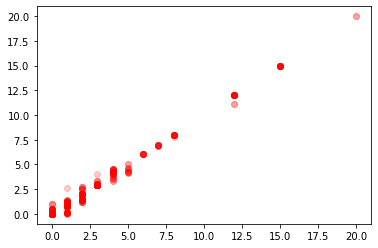

In [44]:
#Plotting our prediction vs test results with RFR model 
plt.scatter(x=y_test,y=y_pred_rf,marker= "o",color="red",alpha=0.2)
plt.plot(x,x,"g--",alpha=0.1)
plt.xlim(0,20)
plt.ylim(0,20)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

##### Observations: 
a. We have few outliers , but most points are lying on the straight line, which shows close match of true and predicted values.  
b. Our model seems to be an accurate predictor. 

In [ ]:
#saving the model as a pickle in a file
import joblib
joblib.dump(rf,'rf_Election.pkl')

['rf_Election.pkl']

### Overall Remarks:
a. Taken output variable as Final Mandate  
b. Understood relationship of FinalMandate by using datavisualization:  
   > 1. Votes, Hondt have linear positive relationship.
    >2. Total Votes, Mandates have discreet values against Target variable. 
    >3. Correlation between many variables >0.9, hence used PCA to decrease dimensionality of the data from 28 to 17  
    >4. Label Encoded object datas such as Party and territory Name for better EDA analysis  
    
c. Removed outliers using z score analysis and converted data into normal distribution  
d. Checked various regressor models and found RandomForest and DecisionTree with best r2score values>0.99  
e. Performed hypertuning to find best parameters of these models and finally chose RF for final model.  
f.  Final score for RFR model is 0.9998 , RMSE is 0.02 and R2 score is 0.9996  
g. Plotted scatter plot and found linear line that shows close match between test and predicted values.  
e. Also RMSE is found to be 0.02 which is close to zero, showing that model fitting is good.   
